Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


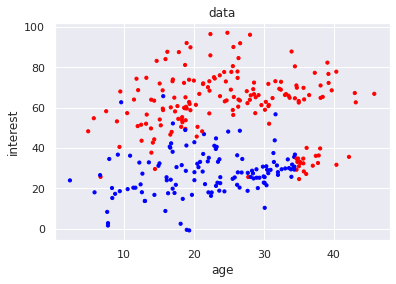

test score(RFC) :  0.9
test score(決定木) :  0.895
test score(svc) :  0.905
test score(SVC標準化) :  0.905
test score(ロジスティック) :  0.86


In [6]:
# CSVデータの読み込み(KaggleからからBeginner's Classification Datasetを持ってきた)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/classification/classification.csv")#データの入力

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(font='IPAexGothic')
colors = {0:'Blue', 1:'red'}
plt.scatter(data["age"].astype(float),data["interest"].astype(float),c=data["success"].map(colors),s=10)

plt.title("data")
plt.xlabel('age')
plt.ylabel('interest')
plt.show()

y=data["success"]#目的関数
x=data.drop(["success"],axis=1)#目的関数以外

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 200)#test_sizeは変更

#RFC
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(x_train, y_train)#学習
#print('train score : ', RFC.score(x_train, y_train))
print('test score(RFC) : ', RFC.score(x_test, y_test))

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)#学習
#print('train score : ', dtree.score(x_train, y_train))
print('test score(決定木) : ', dtree.score(x_test, y_test))

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)#学習
#print('train score : ', svc.score(x_train, y_train))
print('test score(svc) : ', svc.score(x_test, y_test))

# SVCの標準化
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

svc_std = SVC()
svc_std.fit(x_train_std, y_train)
# print('train score scaling : ', svc_std.score(x_train_std, t_train))
print('test score(SVC標準化) : ', svc_std.score(x_test_std, y_test))

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0)
log_reg.fit(x_train, y_train)#学習
#print('train score : ', log_reg.score(x_train, y_train))
print('test score(ロジスティック) : ', log_reg.score(x_test, y_test))